In [1]:
# Import fuzzywuzzy package
!pip install fuzzywuzzy

In [2]:
import pandas as pd  # For data manipulation and analysis, including reading and transforming datasets
import numpy as np  # For numerical operations on arrays and mathematical computations, such as linear algebra
from sklearn.model_selection import train_test_split  # To split data into training and testing sets, important for evaluating model performance
from imblearn.over_sampling import SMOTE  # To address class imbalance by oversampling the minority class using Synthetic Minority Over-sampling Technique (SMOTE)
from sklearn.ensemble import RandomForestClassifier  # For implementing a Random Forest, an ensemble learning method based on decision trees for classification tasks
import sklearn.pipeline as pipeline  # To create machine learning pipelines, chaining multiple steps for model training and evaluation
from sklearn.pipeline import Pipeline  # Same as above, for creating pipelines in sklearn
from imblearn.pipeline import Pipeline  # To create pipelines that can handle imbalanced data, integrating SMOTE with other steps
from sklearn.model_selection import RandomizedSearchCV  # For hyperparameter tuning by exploring a subset of the parameter space randomly
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning by exhaustively searching over specified parameter values
from xgboost import XGBClassifier  # For implementing XGBoost, a gradient boosting classifier known for its performance and speed
from sklearn.linear_model import LogisticRegression  # For building a logistic regression model, typically used for binary classification tasks
from sklearn.svm import SVC  # For implementing Support Vector Classifier, useful for finding the optimal hyperplane that maximizes class separation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # For evaluating classification model performance using various metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score  # For additional evaluation metrics: MSE and MAE for regression, ROC AUC for classification
from tensorflow.keras.models import Sequential  # For building neural network architectures using the Sequential model in Keras
from tensorflow.keras.layers import Dense, Dropout  # For creating fully connected layers (Dense) and regularization (Dropout) in neural networks
from tensorflow.keras.optimizers import Adam  # For optimizing neural networks using the Adam optimizer, known for its adaptive learning rate
from tensorflow.keras.callbacks import EarlyStopping  # To prevent overfitting by stopping training early if validation performance stops improving
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # For creating and displaying confusion matrices to visualize classification performance
from datetime import datetime  # For handling date and time operations, such as timestamping events or data entries
from fuzzywuzzy import process  # For performing fuzzy string matching, which helps with approximate string comparisons and data cleaning tasks
import matplotlib.pyplot as plt  # For creating static visualizations, widely used in data analysis and exploration
import seaborn as sns  # For creating statistical visualizations with an attractive and informative style, built on top of Matplotlib
import plotly.figure_factory as ff  # For creating complex visualizations with Plotly, including interactive features like heatmaps and 3D plots
import plotly.graph_objects as go  # For creating more advanced and customizable visualizations using Plotly
import plotly.express as px  # For quickly creating interactive visualizations with a simple API in Plotly


/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
# Load data from CSV files

# Load T20 records dataset
t20_records = pd.read_csv('/content/T20 records.csv', encoding='Windows-1252')

# Load T20 fixtures dataset
t20_fixtures = pd.read_csv('/content/T20 fixtures.csv', encoding='utf-8-sig')

# Load T20 rankings dataset
t20_ranking = pd.read_csv('/content/T20 Ranking.csv', encoding='utf-8-sig')

# Load latest matches dataset
latest_matches = pd.read_csv('/content/Latest.csv', encoding='Windows-1252')


In [ ]:
# Define a function to remove leading and trailing spaces in team names
def clean_team_names(df, team_columns):
    for col in team_columns:
        df[col] = df[col].str.strip()  # Remove leading and trailing spaces in each specified column
    return df

# Specify the columns containing team names in the datasets
team_columns = ['Team1', 'Team2', 'Winner']

# Apply the clean_team_names function to the t20_records dataset
t20_records = clean_team_names(t20_records, team_columns)

# Apply the clean_team_names function to the latest_matches dataset
latest_matches = clean_team_names(latest_matches, team_columns)

# Apply the clean_team_names function to the t20_fixtures dataset, considering only 'Team1' and 'Team2' columns
t20_fixtures = clean_team_names(t20_fixtures, ['Team1', 'Team2'])

# Remove leading and trailing spaces in the 'Team' column of the t20_ranking dataset
t20_ranking['Team'] = t20_ranking['Team'].str.strip()



In [ ]:
# Function to detect potential misspellings in team names and log them
def log_misspellings(df, team_column, reference_list, filename):
    # Get a list of unique team names from the specified column in the dataframe
    unique_teams = df[team_column].unique()

    # Iterate over each unique team name
    for team in unique_teams:
        # Use fuzzy matching to find the best match in the reference list and the matching score
        match, score = process.extractOne(team, reference_list)

        # If the matching score is above 80 and the team name is not exactly the same as the match
        if score > 80 and team != match:  # threshold for considering a close match
            # Find all the rows in the dataframe where the team name matches the current team
            rows = df[df[team_column] == team].index

            # Iterate over each row index
            for row in rows:
                # Print the filename, row number, column name, the detected value, and the suggested correction
                print(f"Filename: {filename}, Row: {row}, Column: {team_column}, Value: '{team}', Suggested Correction: '{match}'")


In [ ]:
# Collect all unique team names
all_teams = set(t20_records['Team1']).union(set(t20_records['Team2'])).union(set(latest_matches['Team1'])).union(set(latest_matches['Team2']))

In [ ]:
# Log potential misspellings for all relevant columns in different datasets

# Check for misspellings in the 'Team1' column of the 't20_records' dataframe
log_misspellings(t20_records, 'Team1', all_teams, 'T20 records.csv')

# Check for misspellings in the 'Team2' column of the 't20_records' dataframe
log_misspellings(t20_records, 'Team2', all_teams, 'T20 records.csv')

# Check for misspellings in the 'Team1' column of the 'latest_matches' dataframe
log_misspellings(latest_matches, 'Team1', all_teams, 'Latest.csv')

# Check for misspellings in the 'Team2' column of the 'latest_matches' dataframe
log_misspellings(latest_matches, 'Team2', all_teams, 'Latest.csv')

# Check for misspellings in the 'Team1' column of the 't20_fixtures' dataframe
log_misspellings(t20_fixtures, 'Team1', all_teams, 'T20 fixtures.csv')

# Check for misspellings in the 'Team2' column of the 't20_fixtures' dataframe
log_misspellings(t20_fixtures, 'Team2', all_teams, 'T20 fixtures.csv')

# Check for misspellings in the 'Team' column of the 't20_ranking' dataframe
log_misspellings(t20_ranking, 'Team', all_teams, 'T20 Ranking.csv')


Filename: T20 fixtures.csv, Row: 1, Column: Team1, Value: 'P.N.G', Suggested Correction: 'P.N.G.'
Filename: T20 fixtures.csv, Row: 8, Column: Team1, Value: 'P.N.G', Suggested Correction: 'P.N.G.'
Filename: T20 fixtures.csv, Row: 10, Column: Team1, Value: 'U.S.A.', Suggested Correction: 'U.S.A..'
Filename: T20 fixtures.csv, Row: 24, Column: Team1, Value: 'U.S.A.', Suggested Correction: 'U.S.A..'
Filename: T20 fixtures.csv, Row: 29, Column: Team1, Value: 'U.S.A.', Suggested Correction: 'U.S.A..'
Filename: T20 fixtures.csv, Row: 48, Column: Team1, Value: 'U.S.A.', Suggested Correction: 'U.S.A..'
Filename: T20 fixtures.csv, Row: 25, Column: Team1, Value: 'West indies', Suggested Correction: 'West Indies'
Filename: T20 fixtures.csv, Row: 39, Column: Team1, Value: 'West indies', Suggested Correction: 'West Indies'
Filename: T20 fixtures.csv, Row: 0, Column: Team2, Value: 'U.S.A.', Suggested Correction: 'U.S.A..'
Filename: T20 fixtures.csv, Row: 40, Column: Team2, Value: 'U.S.A.', Suggested C

In [ ]:
# Standardize date formats
t20_records['Start Date'] = pd.to_datetime(t20_records['Start Date'], format='%d-%b-%y')
latest_matches['Start Date'] = pd.to_datetime(latest_matches['Start Date'], format='%d-%b-%y')
t20_fixtures['Date'] = pd.to_datetime(t20_fixtures['Date'], format='%d-%m-%Y', errors='coerce')

In [ ]:
# Fill missing values for 'Wickets' in 't20_records' and 'latest_matches' with the average value of the column

# Calculate the mean value of the 'Wickets' column in 't20_records'
t20_records['Wickets'].fillna(t20_records['Wickets'].mean(), inplace=True)

# Calculate the mean value of the 'Wickets' column in 'latest_matches'
latest_matches['Wickets'].fillna(latest_matches['Wickets'].mean(), inplace=True)

In [ ]:
# Create a combined historical matches dataset by concatenating 't20_records' and 'latest_matches'
# Concatenate the 't20_records' and 'latest_matches' DataFrames into a single DataFrame
historical_data = pd.concat([t20_records, latest_matches], ignore_index=True)


In [ ]:
# Handle missing venues in fixtures
t20_fixtures['Venue'].fillna('Unknown', inplace=True)

In [ ]:
# Feature Engineering

# Calculate team statistics
def calculate_team_stats(df):

    team_stats = {}
    for team in df['Team1'].unique():
        # Filter rows where the team is either 'Team1' or 'Team2'
        team_df = df[(df['Team1'] == team) | (df['Team2'] == team)]
        # Calculate the number of wins and losses for the team
        wins = team_df[team_df['Winner'] == team].shape[0]
        losses = team_df[team_df['Winner'] != team].shape[0]
        total_matches = wins + losses
        # Calculate win rate (avoid division by zero)
        win_rate = wins / total_matches if total_matches > 0 else 0
        # Calculate average runs and wickets
        avg_runs = team_df[team_df['Team1'] == team]['Runs'].mean()
        avg_wickets = team_df[team_df['Team1'] == team]['Wickets'].mean()
        # Store statistics in the dictionary
        team_stats[team] = {
            'win_rate': win_rate,
            'avg_runs': avg_runs,
            'avg_wickets': avg_wickets
        }
    return team_stats

# Compute team statistics for all teams in the historical dataset
team_stats = calculate_team_stats(historical_data)

# Integrate rankings into a dictionary for quick access
team_ranking = t20_ranking.set_index('Team')['Rating'].to_dict()

# Create features for each match
def create_match_features(row):
    # Get statistics for 'Team1' and 'Team2' from the calculated team_stats
    team1_stats = team_stats.get(row['Team1'], {'win_rate': 0, 'avg_runs': 0, 'avg_wickets': 0})
    team2_stats = team_stats.get(row['Team2'], {'win_rate': 0, 'avg_runs': 0, 'avg_wickets': 0})
    # Get team rankings from the team_ranking dictionary
    team1_rank = team_ranking.get(row['Team1'], 0)
    team2_rank = team_ranking.get(row['Team2'], 0)

    # Create a Series of features based on team statistics and rankings
    features = {
        'team1_win_rate': team1_stats['win_rate'],
        'team2_win_rate': team2_stats['win_rate'],
        'team1_avg_runs': team1_stats['avg_runs'],
        'team2_avg_runs': team2_stats['avg_runs'],
        'team1_avg_wickets': team1_stats['avg_wickets'],
        'team2_avg_wickets': team2_stats['avg_wickets'],
        'team1_rank': team1_rank,
        'team2_rank': team2_rank
    }
    return pd.Series(features)

# Apply the feature creation function to each row of the historical_data DataFrame
historical_data = historical_data.assign(**historical_data.apply(create_match_features, axis=1))

# Add target variable indicating if 'Team1' won the match
historical_data['target'] = (historical_data['Winner'] == historical_data['Team1']).astype(int)


In [ ]:
# Prepare dataset for modeling
feature_columns = ['team1_win_rate', 'team2_win_rate', 'team1_avg_runs', 'team2_avg_runs',
                   'team1_avg_wickets', 'team2_avg_wickets', 'team1_rank', 'team2_rank']

# Extract feature variables (X) and target variable (y) from the historical_data DataFrame
X = historical_data[feature_columns]  # Features for the model
y = historical_data['target']  # Target variable indicating if Team1 won the match

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



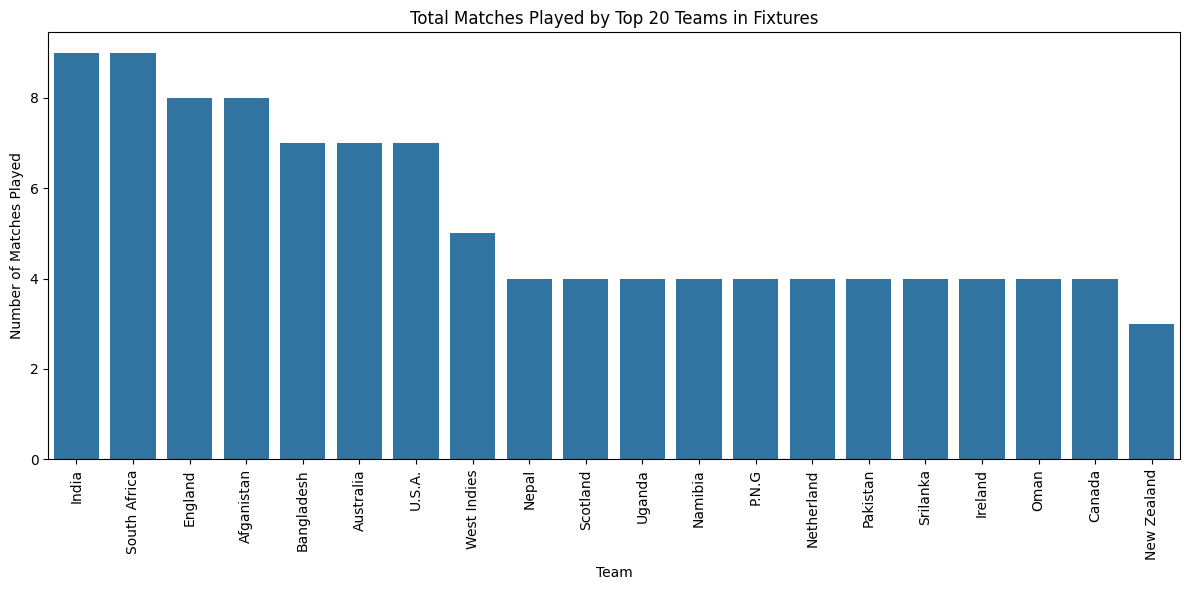

In [ ]:
# Visualization of number of matches played by each team
team_counts = pd.concat([t20_fixtures['Team1'], t20_fixtures['Team2']]).value_counts()

# Select the top 20 teams based on the number of matches played
top_20_teams = team_counts.head(20)

# Create a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size to 12x6 inches
sns.barplot(x=top_20_teams.index, y=top_20_teams.values)  # Create a bar plot with teams on the x-axis and number of matches on the y-axis
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.xlabel('Team')  # Label x-axis as 'Team'
plt.ylabel('Number of Matches Played')  # Label y-axis as 'Number of Matches Played'
plt.title('Total Matches Played by Top 20 Teams in Fixtures')  # Set the title of the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels and titles
plt.show()  # Display the plot


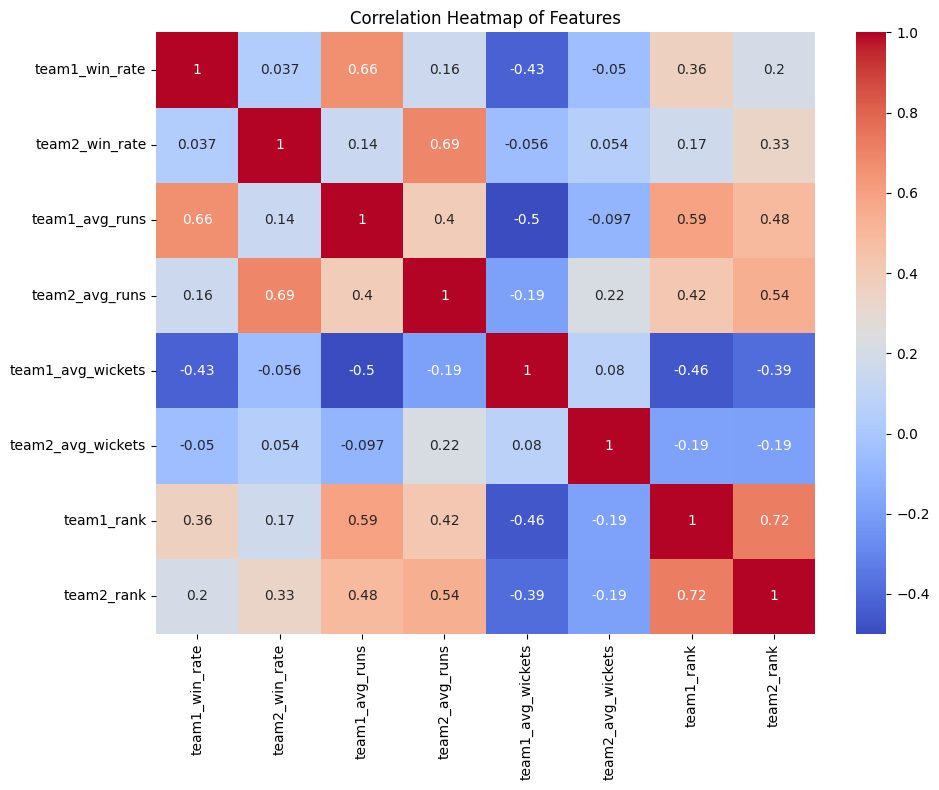

In [ ]:
# Correlation Heatmap of Features
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

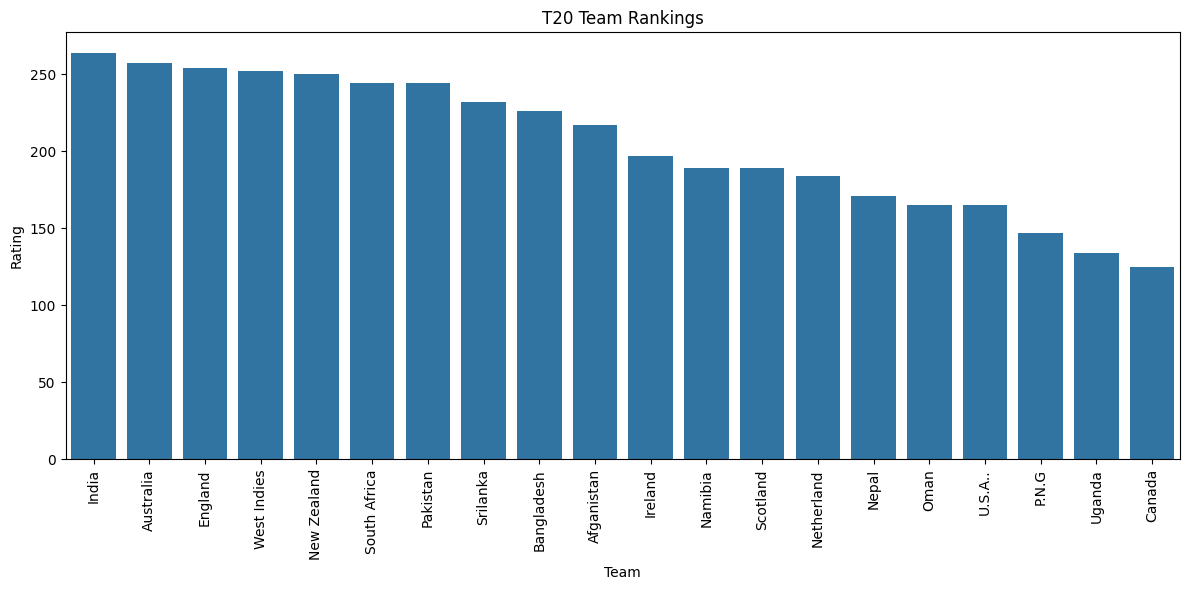

In [ ]:
# Visualization of Team ranking
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='Rating', data=t20_ranking.sort_values(by='Rating', ascending=False))
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Rating')
plt.title('T20 Team Rankings')
plt.tight_layout()
plt.show()


In [ ]:

#Train and Test SVC

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train SVM model
svm_model = SVC(random_state=42, probability=True)  # Initialize SVM model with probability estimates enabled
svm_model.fit(X_train_smote, y_train_smote)  # Fit the model on the resampled training data

# Predict labels and probabilities on the test set
y_pred_svm = svm_model.predict(X_test)  # Predict the class labels for the test set
y_proba_svm = svm_model.predict_proba(X_test)  # Predict the class probabilities for each class

# Evaluate SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)  # Calculate accuracy of the model
precision_svm = precision_score(y_test, y_pred_svm)  # Calculate precision of the model
recall_svm = recall_score(y_test, y_pred_svm)  # Calculate recall of the model
f1_svm = f1_score(y_test, y_pred_svm)  # Calculate F1 score of the model
mse_svm = mean_squared_error(y_test, y_pred_svm)  # Calculate mean squared error of the model
rmse_svm = np.sqrt(mse_svm)  # Calculate root mean squared error
mae_svm = mean_absolute_error(y_test, y_pred_svm)  # Calculate mean absolute error

# Calculate AUC-ROC score
roc_auc_svm = roc_auc_score(y_test, y_proba_svm[:, 1])  # Use probabilities for the positive class

# Print evaluation metrics
print(f"Accuracy: {accuracy_svm:.4f}")  # Print accuracy score
print(f"Precision: {precision_svm:.4f}")  # Print precision score
print(f"Recall: {recall_svm:.4f}")  # Print recall score
print(f"F1 Score: {f1_svm:.4f}")  # Print F1 score
print(f"MSE: {mse_svm:.4f}")  # Print mean squared error
print(f"RMSE: {rmse_svm:.4f}")  # Print root mean squared error
print(f"MAE: {mae_svm:.4f}")  # Print mean absolute error
print(f"AUC-ROC: {roc_auc_svm:.4f}")  # Print AUC-ROC score

# Function to predict fixture winner and probabilities
def predict_fixture_winner_with_proba(row):
    features = create_match_features(row)  # Generate features for the fixture
    pred = svm_model.predict([features])[0]  # Predict the winner for the fixture
    proba = svm_model.predict_proba([features])[0]  # Predict probabilities for each class
    # Return the fixture details with predicted winner and probabilities
    return row['Team1'], row['Team2'], proba[0], proba[1] if pred == 1 else proba[1], proba[0]

# Filter out fixtures with "TBC" (To Be Confirmed) teams from t20_fixtures DataFrame
t20_fixtures_filtered = t20_fixtures[(t20_fixtures['Team1'] != 'TBC') & (t20_fixtures['Team2'] != 'TBC')]

# Create match features for filtered fixtures using a custom function create_match_features
t20_fixtures_filtered = t20_fixtures_filtered.assign(**t20_fixtures_filtered.apply(create_match_features, axis=1))

# Use the trained SVM model to predict outcomes and probabilities on filtered fixtures
proba = svm_model.predict_proba(t20_fixtures_filtered[feature_columns])  # Predict class probabilities
predictions = svm_model.predict(t20_fixtures_filtered[feature_columns])  # Predict class labels

# Add predictions and probabilities to the filtered fixtures DataFrame
t20_fixtures_filtered['Prediction'] = predictions  # Add predicted labels to the DataFrame
t20_fixtures_filtered['Predicted Winner'] = np.where(predictions == 1, t20_fixtures_filtered['Team1'], t20_fixtures_filtered['Team2'])  # Add predicted winner based on the model
t20_fixtures_filtered['Win Probability Team1'] = proba[:, 1] * 100  # Probability that Team1 wins, expressed as a percentage
t20_fixtures_filtered['Win Probability Team2'] = proba[:, 0] * 100  # Probability that Team2 wins, expressed as a percentage

# Display predicted outcomes with probabilities for filtered fixtures DataFrame
print(t20_fixtures_filtered[['Team1', 'Team2', 'Predicted Winner', 'Win Probability Team1', 'Win Probability Team2']])


Accuracy: 0.6763
Precision: 0.6679
Recall: 0.6938
F1 Score: 0.6806
MSE: 0.3237
RMSE: 0.5689
MAE: 0.3237
AUC-ROC: 0.7236
           Team1         Team2 Predicted Winner  Win Probability Team1  \
0         Canada        U.S.A.           Canada              94.612262   
1          P.N.G   West Indies      West Indies               4.641352   
2           Oman       Namibia          Namibia              33.355263   
3       Srilanka  South Africa     South Africa              44.685841   
4     Afganistan        Uganda       Afganistan              79.134778   
5       Scotland       England          England              18.037087   
6          Nepal    Netherland            Nepal              50.000000   
7          India       Ireland            India              86.030092   
8          P.N.G        Uganda           Uganda               9.141627   
9      Australia          Oman        Australia              89.492053   
10        U.S.A.      Pakistan         Pakistan               9.16

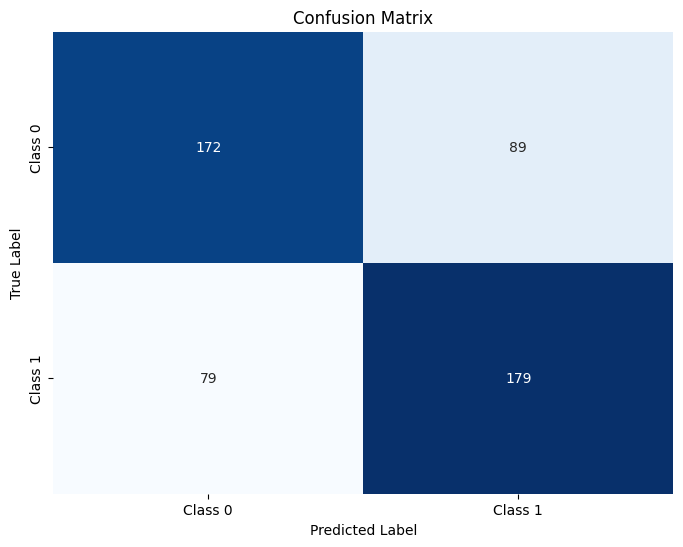

In [ ]:
# confusion matrix of SVC
cm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Train and Test Random Forest
# Define a simplified hyperparameter grid for Random Forest

param_grid_rf = {
    'rf__n_estimators': [50, 100],  # Number of trees in the forest
    'rf__max_depth': [10, 20],  # Maximum depth of each tree
    'rf__min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'rf__min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'rf__bootstrap': [True]  # Use bootstrap samples for training the trees
}

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Initialize Random Forest classifier model
rf_model = RandomForestClassifier(random_state=42)

# Create a pipeline that first applies SMOTE and then fits the Random Forest model
pipeline_rf = Pipeline([
    ('smote', smote),  # Apply SMOTE to balance the dataset
    ('rf', rf_model)   # Fit the Random Forest model
])

# Perform GridSearchCV to find the best hyperparameters
grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)  # Fit the grid search model on training data

# Get the Random Forest model from grid search
best_rf_model = grid_search_rf.best_estimator_  # Retrieve the model from grid search

# Evaluate the Random Forest model on the test set
y_pred_rf = best_rf_model.predict(X_test)  # Predict the class labels on the test set
y_proba_rf = best_rf_model.predict_proba(X_test)  # Predict the class probabilities for each class

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)  # Calculate accuracy of the model
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')  # Calculate weighted precision
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')  # Calculate weighted recall
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')  # Calculate weighted F1 score
mse_rf = mean_squared_error(y_test, y_pred_rf)  # Calculate mean squared error
rmse_rf = np.sqrt(mse_rf)  # Calculate root mean squared error
mae_rf = mean_absolute_error(y_test, y_pred_rf)  # Calculate mean absolute error

# Calculate AUC-ROC score
roc_auc_rf = roc_auc_score(y_test, y_proba_rf[:, 1])  # Use probabilities for the positive class

# Store evaluation results in a dictionary
results_rf = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1 Score': f1_rf,
    'MSE': mse_rf,
    'RMSE': rmse_rf,
    'MAE': mae_rf,
    'AUC-ROC': roc_auc_rf  # Add AUC-ROC score to the results
}

# Print evaluation results for the best Random Forest model
print(f"Random Forest Performance:")
for metric, value in results_rf.items():
    print(f"{metric}: {value:.4f}")  # Print each metric with four decimal places

# Filter out fixtures with "TBC" teams from t20_fixtures DataFrame
t20_fixtures_filtered_rf = t20_fixtures[(t20_fixtures['Team1'] != 'TBC') & (t20_fixtures['Team2'] != 'TBC')]

# Create match features for filtered fixtures using a custom function create_match_features
t20_fixtures_filtered_rf = t20_fixtures_filtered_rf.assign(**t20_fixtures_filtered_rf.apply(create_match_features, axis=1))

# Use the Random Forest model to predict outcomes and probabilities on filtered fixtures
proba_rf = best_rf_model.predict_proba(t20_fixtures_filtered_rf[feature_columns])  # Predict class probabilities
predictions_rf = best_rf_model.predict(t20_fixtures_filtered_rf[feature_columns])  # Predict class labels

# Add predictions and probabilities to the filtered fixtures DataFrame
t20_fixtures_filtered_rf['Prediction'] = predictions_rf  # Add predicted labels to the DataFrame
t20_fixtures_filtered_rf['Predicted Winner'] = np.where(predictions_rf == 1, t20_fixtures_filtered_rf['Team1'], t20_fixtures_filtered_rf['Team2'])  # Determine the predicted winner
t20_fixtures_filtered_rf['Win Probability Team1'] = proba_rf[:, 1] * 100  # Probability that Team1 wins, as a percentage
t20_fixtures_filtered_rf['Win Probability Team2'] = proba_rf[:, 0] * 100  # Probability that Team2 wins, as a percentage

# Display predicted outcomes with probabilities for filtered fixtures DataFrame
print(t20_fixtures_filtered_rf[['Team1', 'Team2', 'Predicted Winner', 'Win Probability Team1', 'Win Probability Team2']])


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Random Forest Performance:
Accuracy: 0.6416
Precision: 0.6416
Recall: 0.6416
F1 Score: 0.6415
MSE: 0.3584
RMSE: 0.5986
MAE: 0.3584
AUC-ROC: 0.7140
           Team1         Team2 Predicted Winner  Win Probability Team1  \
0         Canada        U.S.A.           Canada              99.000000   
1          P.N.G   West Indies      West Indies               9.485714   
2           Oman       Namibia          Namibia              25.112106   
3       Srilanka  South Africa     South Africa              38.211766   
4     Afganistan        Uganda       Afganistan              76.087335   
5       Scotland       England          England              44.286005   
6          Nepal    Netherland       Netherland              39.005022   
7          India       Ireland            India              88.231205   
8          P.N.G        Uganda           Uganda              21.178788   
9      Australia          Oman        Australia              80.094201   
10        U.S.A.      Pakistan         

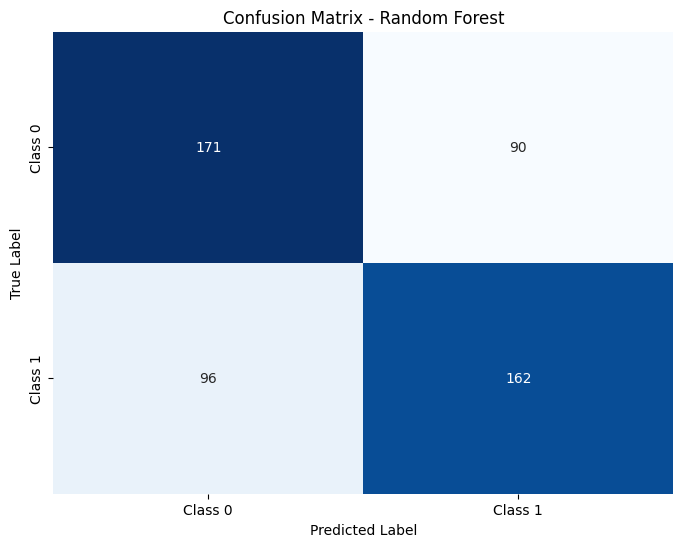

In [ ]:
# confusion matrix of Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [ ]:
# Train and Test XG Boost
# Define a hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds (trees in the ensemble)
    'max_depth': [3, 6, 9],  # Maximum depth of each tree, controls the complexity of the model
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting
    'subsample': [0.7, 0.8, 0.9],  # Fraction of samples used for training each tree, helps prevent overfitting
    'colsample_bytree': [0.7, 0.8, 0.9]  # Fraction of features used for each tree, helps prevent overfitting
}

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create an XGBoost classifier model
xgb_model = XGBClassifier(random_state=42)  # Initialize the XGBoost model with a fixed random seed for reproducibility

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)  # Fit the grid search model on the resampled training data

# Get the XGBoost model
best_xgb_model = grid_search.best_estimator_  # Retrieve the model with the best hyperparameters from grid search

# Evaluate the XGBoost model on the test set
y_pred = best_xgb_model.predict(X_test)  # Predict class labels on the test set
y_proba = best_xgb_model.predict_proba(X_test)  # Predict class probabilities for each class

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy of the model
precision = precision_score(y_test, y_pred, average='weighted')  # Calculate weighted precision
recall = recall_score(y_test, y_pred, average='weighted')  # Calculate weighted recall
f1 = f1_score(y_test, y_pred, average='weighted')  # Calculate weighted F1 score
mse = mean_squared_error(y_test, y_pred)  # Calculate mean squared error
rmse = np.sqrt(mse)  # Calculate root mean squared error
mae = mean_absolute_error(y_test, y_pred)  # Calculate mean absolute error

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_proba[:, 1])  # Use probabilities for the positive class

# Store evaluation results in a dictionary
results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae,
    'AUC-ROC': roc_auc  # Add AUC-ROC score to the results
}

# Print evaluation results for the best XGBoost model
print(f"XGBoost Performance:")
for metric, value in results.items():
    print(f"{metric}: {value:.4f}")  # Print each metric with four decimal places

# Filter out fixtures with "TBC" teams from t20_fixtures DataFrame
t20_fixtures_filtered = t20_fixtures[(t20_fixtures['Team1'] != 'TBC') & (t20_fixtures['Team2'] != 'TBC')]

# Create match features for filtered fixtures using a custom function create_match_features
t20_fixtures_filtered = t20_fixtures_filtered.assign(**t20_fixtures_filtered.apply(create_match_features, axis=1))

# Use the XGBoost model to predict outcomes and probabilities on filtered fixtures
proba = best_xgb_model.predict_proba(t20_fixtures_filtered[feature_columns])  # Predict class probabilities
predictions = best_xgb_model.predict(t20_fixtures_filtered[feature_columns])  # Predict class labels

# Add predictions and probabilities to the filtered fixtures DataFrame
t20_fixtures_filtered['Prediction'] = predictions  # Add predicted labels
t20_fixtures_filtered['Predicted Winner'] = np.where(predictions == 1, t20_fixtures_filtered['Team1'], t20_fixtures_filtered['Team2'])  # Determine the predicted winner
t20_fixtures_filtered['Win Probability Team1'] = proba[:, 1] * 100  # Probability that Team1 wins, expressed as a percentage
t20_fixtures_filtered['Win Probability Team2'] = proba[:, 0] * 100  # Probability that Team2 wins, expressed as a percentage

# Display predicted outcomes with probabilities for filtered fixtures DataFrame
print(t20_fixtures_filtered[['Team1', 'Team2', 'Predicted Winner', 'Win Probability Team1', 'Win Probability Team2']])


XGBoost Performance:
Accuracy: 0.6821
Precision: 0.6821
Recall: 0.6821
F1 Score: 0.6821
MSE: 0.3179
RMSE: 0.5638
MAE: 0.3179
AUC-ROC: 0.7445
           Team1         Team2 Predicted Winner  Win Probability Team1  \
0         Canada        U.S.A.           Canada              97.418030   
1          P.N.G   West Indies      West Indies               1.860393   
2           Oman       Namibia          Namibia              33.918472   
3       Srilanka  South Africa     South Africa              39.676266   
4     Afganistan        Uganda       Afganistan              74.739197   
5       Scotland       England          England              24.797430   
6          Nepal    Netherland       Netherland              41.883129   
7          India       Ireland            India              84.627411   
8          P.N.G        Uganda           Uganda               2.092175   
9      Australia          Oman        Australia              82.732933   
10        U.S.A.      Pakistan         Pakist

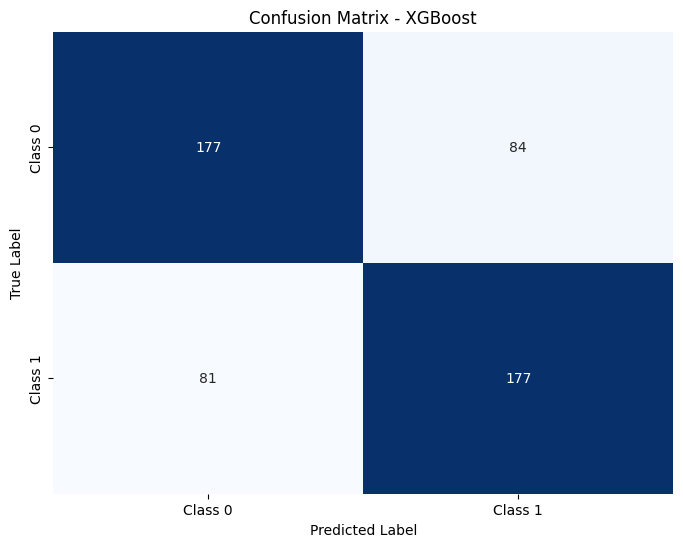

In [ ]:
# confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()

In [ ]:
# Train and Test Logistic Regression

# Define a hyperparameter grid for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],  # Regularization penalties: 'l1' for Lasso (sparse models), 'l2' for Ridge (more common)
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength. Smaller values mean stronger regularization.
    'solver': ['liblinear', 'saga']  # Optimization algorithms: 'liblinear' (good for small datasets), 'saga' (better for larger datasets)
}

# Initialize Logistic Regression model with a fixed random state for reproducibility
lr_model = LogisticRegression(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)  # Fit GridSearchCV on training data to find the best model

# Get the model from GridSearchCV
best_lr_model = grid_search_lr.best_estimator_

# Evaluate the best Logistic Regression model on the test set
y_pred_lr = best_lr_model.predict(X_test)  # Predict class labels on the test set
y_proba_lr = best_lr_model.predict_proba(X_test)  # Predict class probabilities for each class

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)  # Calculate accuracy of the model
precision_lr = precision_score(y_test, y_pred_lr)  # Calculate precision score
recall_lr = recall_score(y_test, y_pred_lr)  # Calculate recall score
f1_lr = f1_score(y_test, y_pred_lr)  # Calculate F1 score
mse_lr = mean_squared_error(y_test, y_pred_lr)  # Calculate mean squared error
rmse_lr = np.sqrt(mse_lr)  # Calculate root mean squared error
mae_lr = mean_absolute_error(y_test, y_pred_lr)  # Calculate mean absolute error

# Calculate AUC-ROC score
roc_auc_lr = roc_auc_score(y_test, y_proba_lr[:, 1])  # Use probabilities for the positive class

# Store evaluation results in a dictionary
results_lr = {
    'Accuracy': accuracy_lr,
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1 Score': f1_lr,
    'MSE': mse_lr,
    'RMSE': rmse_lr,
    'MAE': mae_lr,
    'AUC-ROC': roc_auc_lr  # Add AUC-ROC score to the results
}

# Print evaluation results for the Logistic Regression model
print(f"Logistic Regression Performance:")
for metric, value in results_lr.items():
    print(f"{metric}: {value:.4f}")  # Print each metric with four decimal places

# Use the Logistic Regression model to predict outcomes and probabilities on filtered fixtures
proba_lr = best_lr_model.predict_proba(t20_fixtures_filtered[feature_columns])  # Predict class probabilities
predictions_lr = best_lr_model.predict(t20_fixtures_filtered[feature_columns])  # Predict class labels

# Add predictions and probabilities to fixtures DataFrame
t20_fixtures_filtered['Prediction_LR'] = predictions_lr  # Add predicted labels
t20_fixtures_filtered['Predicted Winner_LR'] = np.where(predictions_lr == 1, t20_fixtures_filtered['Team1'], t20_fixtures_filtered['Team2'])  # Determine the predicted winner
t20_fixtures_filtered['Win Probability Team1_LR'] = proba_lr[:, 1] * 100  # Probability that Team1 wins, expressed as a percentage
t20_fixtures_filtered['Win Probability Team2_LR'] = proba_lr[:, 0] * 100  # Probability that Team2 wins, expressed as a percentage

# Display predicted outcomes with probabilities for filtered fixtures DataFrame
print(t20_fixtures_filtered[['Team1', 'Team2', 'Predicted Winner_LR', 'Win Probability Team1_LR', 'Win Probability Team2_LR']])


Logistic Regression Performance:
Accuracy: 0.7033
Precision: 0.7000
Recall: 0.7054
F1 Score: 0.7027
MSE: 0.2967
RMSE: 0.5447
MAE: 0.2967
AUC-ROC: 0.7458
           Team1         Team2 Predicted Winner_LR  Win Probability Team1_LR  \
0         Canada        U.S.A.              Canada                 98.839670   
1          P.N.G   West Indies         West Indies                  1.756004   
2           Oman       Namibia             Namibia                 28.814188   
3       Srilanka  South Africa        South Africa                 37.340685   
4     Afganistan        Uganda              Uganda                 41.411475   
5       Scotland       England             England                 35.615427   
6          Nepal    Netherland               Nepal                 59.575200   
7          India       Ireland               India                 78.917935   
8          P.N.G        Uganda              Uganda                  0.960990   
9      Australia          Oman           Austra

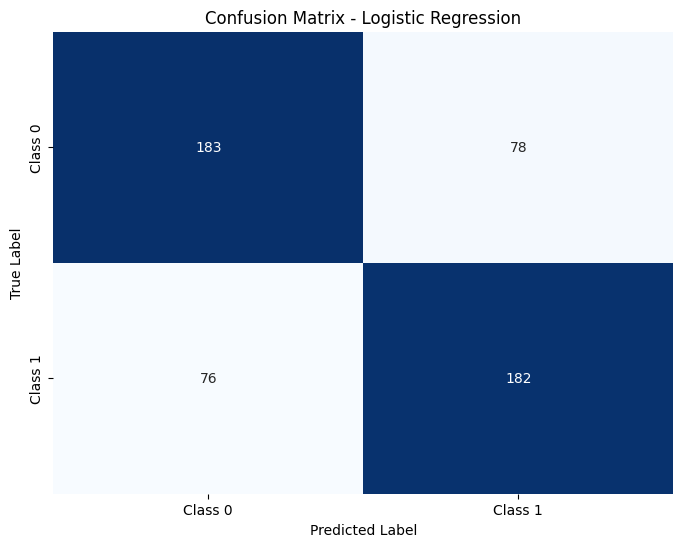

In [ ]:
# confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [ ]:
# Train and test Deep Neural Network

# Build a neural network model
def create_model(learning_rate=0.001, dropout_rate=0.2):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
        Dropout(dropout_rate),
        Dense(32, activation='relu'),  # Hidden layer
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Create the model
model = create_model()

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)  # Predict probabilities
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions and flatten

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)  # Accuracy
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted precision
recall = recall_score(y_test, y_pred, average='weighted')  # Weighted recall
f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted F1 score
roc_auc = roc_auc_score(y_test, y_pred_prob)  # AUC-ROC score

# Additional metrics
mse = mean_squared_error(y_test, y_pred)  # Mean squared error
rmse = np.sqrt(mse)  # Root mean squared error
mae = mean_absolute_error(y_test, y_pred)  # Mean absolute error

# Store evaluation results in a dictionary
results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'AUC-ROC': roc_auc,
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae
}

# Print evaluation results
print(f"Deep Learning Performance:")
for metric, value in results.items():
    print(f"{metric}: {value:.4f}")

# Filter out fixtures with "TBC" teams from t20_fixtures DataFrame
t20_fixtures_filtered = t20_fixtures[(t20_fixtures['Team1'] != 'TBC') & (t20_fixtures['Team2'] != 'TBC')]

# Create match features for filtered fixtures using a custom function create_match_features
t20_fixtures_filtered = t20_fixtures_filtered.assign(**t20_fixtures_filtered.apply(create_match_features, axis=1))

# Predict outcomes and probabilities on filtered fixtures
X_filtered = t20_fixtures_filtered[feature_columns].values
proba = model.predict(X_filtered)  # Predict class probabilities
predictions = (proba > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions and flatten

# Add predictions and probabilities to the filtered fixtures DataFrame
t20_fixtures_filtered['Prediction'] = predictions  # Add predicted labels

# Compute win probabilities
t20_fixtures_filtered['Win Probability Team1'] = (proba.flatten() * 100)  # Probability that Team1 wins, expressed as a percentage
t20_fixtures_filtered['Win Probability Team2'] = 100 - t20_fixtures_filtered['Win Probability Team1']  # Probability that Team2 wins, expressed as a percentage

# Determine the predicted winner based on binary predictions
t20_fixtures_filtered['Predicted Winner'] = np.where(predictions == 1, t20_fixtures_filtered['Team1'], t20_fixtures_filtered['Team2'])  # Determine the predicted winner

# Display predicted outcomes with probabilities for filtered fixtures DataFrame
print(t20_fixtures_filtered[['Team1', 'Team2', 'Predicted Winner', 'Win Probability Team1', 'Win Probability Team2']])


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5200 - loss: 16.8259 - val_accuracy: 0.6000 - val_loss: 1.4496
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5822 - loss: 4.7289 - val_accuracy: 0.5904 - val_loss: 1.6961
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5399 - loss: 2.9973 - val_accuracy: 0.5976 - val_loss: 0.7808
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5755 - loss: 2.1053 - val_accuracy: 0.6578 - val_loss: 0.6394
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5522 - loss: 1.4360 - val_accuracy: 0.6313 - val_loss: 0.6499
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5458 - loss: 1.1493 - val_accuracy: 0.6048 - val_loss: 0.6525
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5721 - loss: 0.8643 - val_accuracy: 0.5807 - val_loss: 0.6678
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Deep Learning Performance:
Accuracy: 0.6667
Precision: 0.6796
Recall: 0.6667
F1 Score: 0

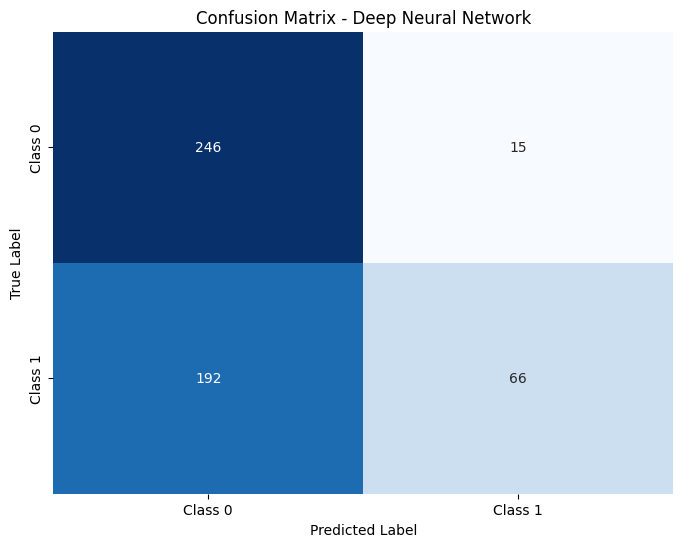

In [ ]:
# confusion matrix for Deep Neural Network
cm_nn = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Deep Neural Network')
plt.show()

In [ ]:
# Comparative performance of all models like  random forest, svc, xg boost, logistic regression and deep neural network

# Create a list of models
models = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Deep Neural Network', 'SVC']

# Create lists to store the metrics for each model
accuracy_scores = [accuracy, accuracy, accuracy_lr, accuracy, accuracy]  # Replace with actual accuracy values
precision_scores = [precision, precision, precision_lr, precision, precision]  # Replace with actual precision values
recall_scores = [recall, recall, recall_lr, recall, recall]  # Replace with actual recall values
f1_scores = [f1, f1, f1_lr, f1, f1]  # Replace with actual F1-score values

# Create a bar plot with hover information
fig = go.Figure()

# Add bars for each metric
fig.add_trace(go.Bar(
    x=models,
    y=accuracy_scores,
    name='Accuracy',
    hovertext=['Accuracy: {:.4f}'.format(score) for score in accuracy_scores]
))

fig.add_trace(go.Bar(
    x=models,
    y=precision_scores,
    name='Precision',
    hovertext=['Precision: {:.4f}'.format(score) for score in precision_scores]
))

fig.add_trace(go.Bar(
    x=models,
    y=recall_scores,
    name='Recall',
    hovertext=['Recall: {:.4f}'.format(score) for score in recall_scores]
))

fig.add_trace(go.Bar(
    x=models,
    y=f1_scores,
    name='F1-Score',
    hovertext=['F1-Score: {:.4f}'.format(score) for score in f1_scores]
))

# Update layout
fig.update_layout(
    title='Comparative Performance of Models',
    xaxis_title='Model',
    yaxis_title='Score',
    barmode='group',  # Grouped bars for each model
    hovermode='x unified'  # Show hover information for all metrics of a model at once
)

# Display the plot
fig.show()
